In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

*  radius (mean of distances from center to points on the perimeter)
*  texture (standard deviation of gray-scale values)
*  perimeter
*  area
*  smoothness (local variation in radius lengths)
*  compactness (perimeter^2 / area - 1.0)
*  concavity (severity of concave portions of the contour)
*  concave points (number of concave portions of the contour)
*  symmetry
*  fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

**PROJECT DETAILS:**
Breast cancer (BC) is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society. The early diagnosis of BC can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. ML techniques are being broadly used in the breast cancer classification problem. They provide high classification accuracy and effective diagnostic capabilities.

Task -

* Data importing, cleaning and Inspecting (check whether any null/duplicate values are present)
* Data Preprocessing
* EDA
* Label Encoding (if required)
* Perform PCA for dimensionality reduction
* Model Building - Select the best performing classification model as final model, based upon highest accuracy score.
* Deploy it using Flask/Streamlit.

In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import os
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

# Data importing, cleaning and Inspecting 

In [2]:
df=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
#temp=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape                                          #569 rows 33 columns

(569, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

* Since all data (apart from diagnosis) is in numerical form, label encoding is not required.
* Drop column 32.
* No null values in other columns.

In [5]:
df.drop(columns=['Unnamed: 32'],axis=1,inplace=True)

Check for duplicate entries: 

In [6]:
dup = df[df.duplicated('id')]
dup

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


No duplicate values.

In [7]:
df.drop(columns=['id']).describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Data preprocessing

Drop column id

In [29]:
df.drop(columns=['id'],inplace=True)

# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00a512c210>,
      dtype=object)

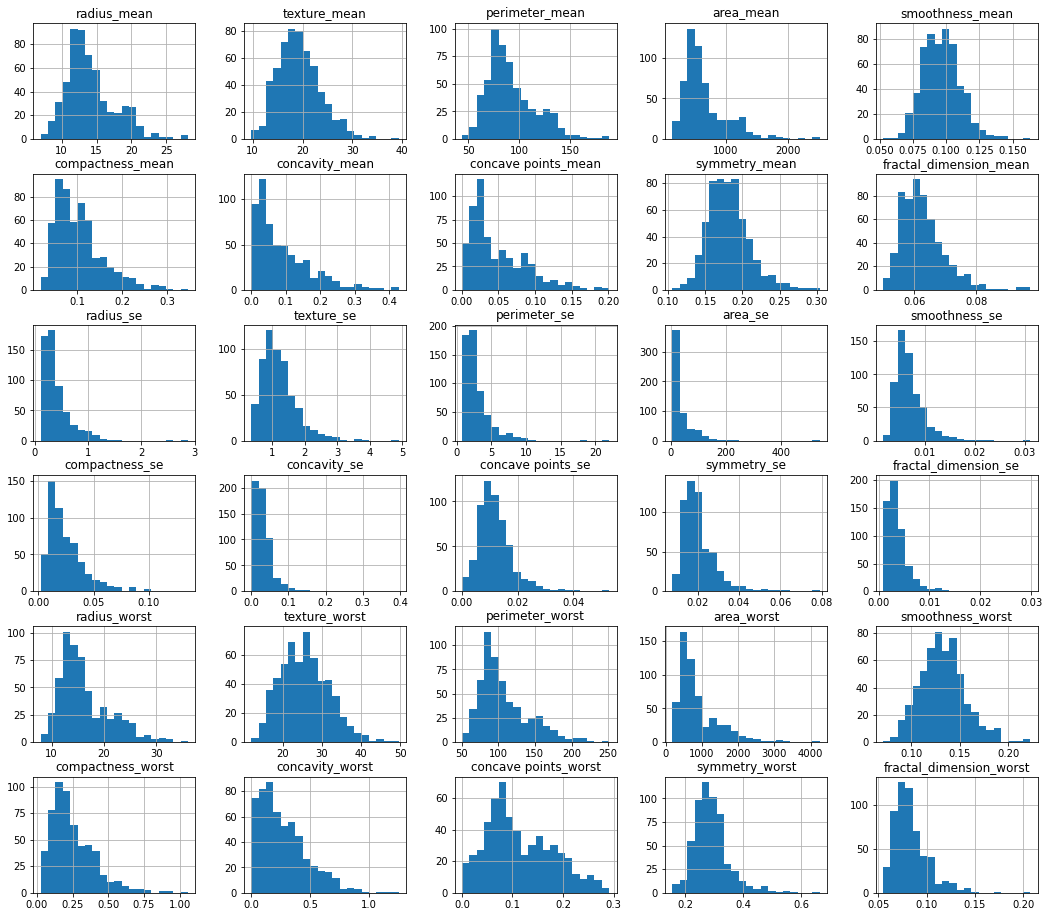

In [8]:
df.drop(columns=['id']).hist(bins=20,figsize=(18, 16))

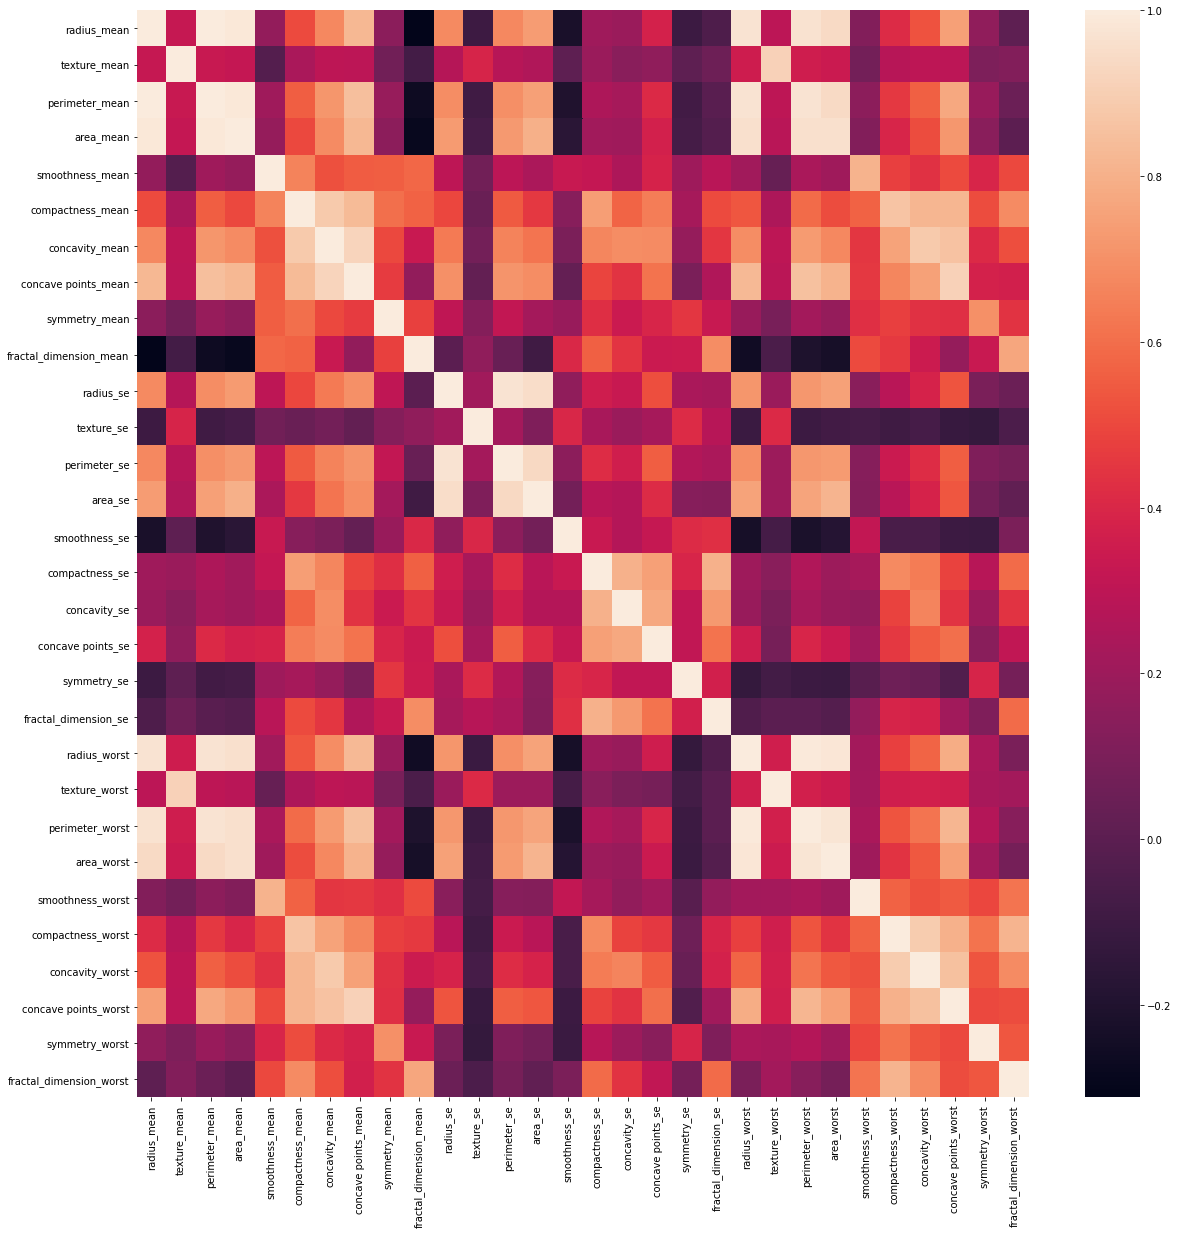

In [9]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.drop(columns=['id']).corr());

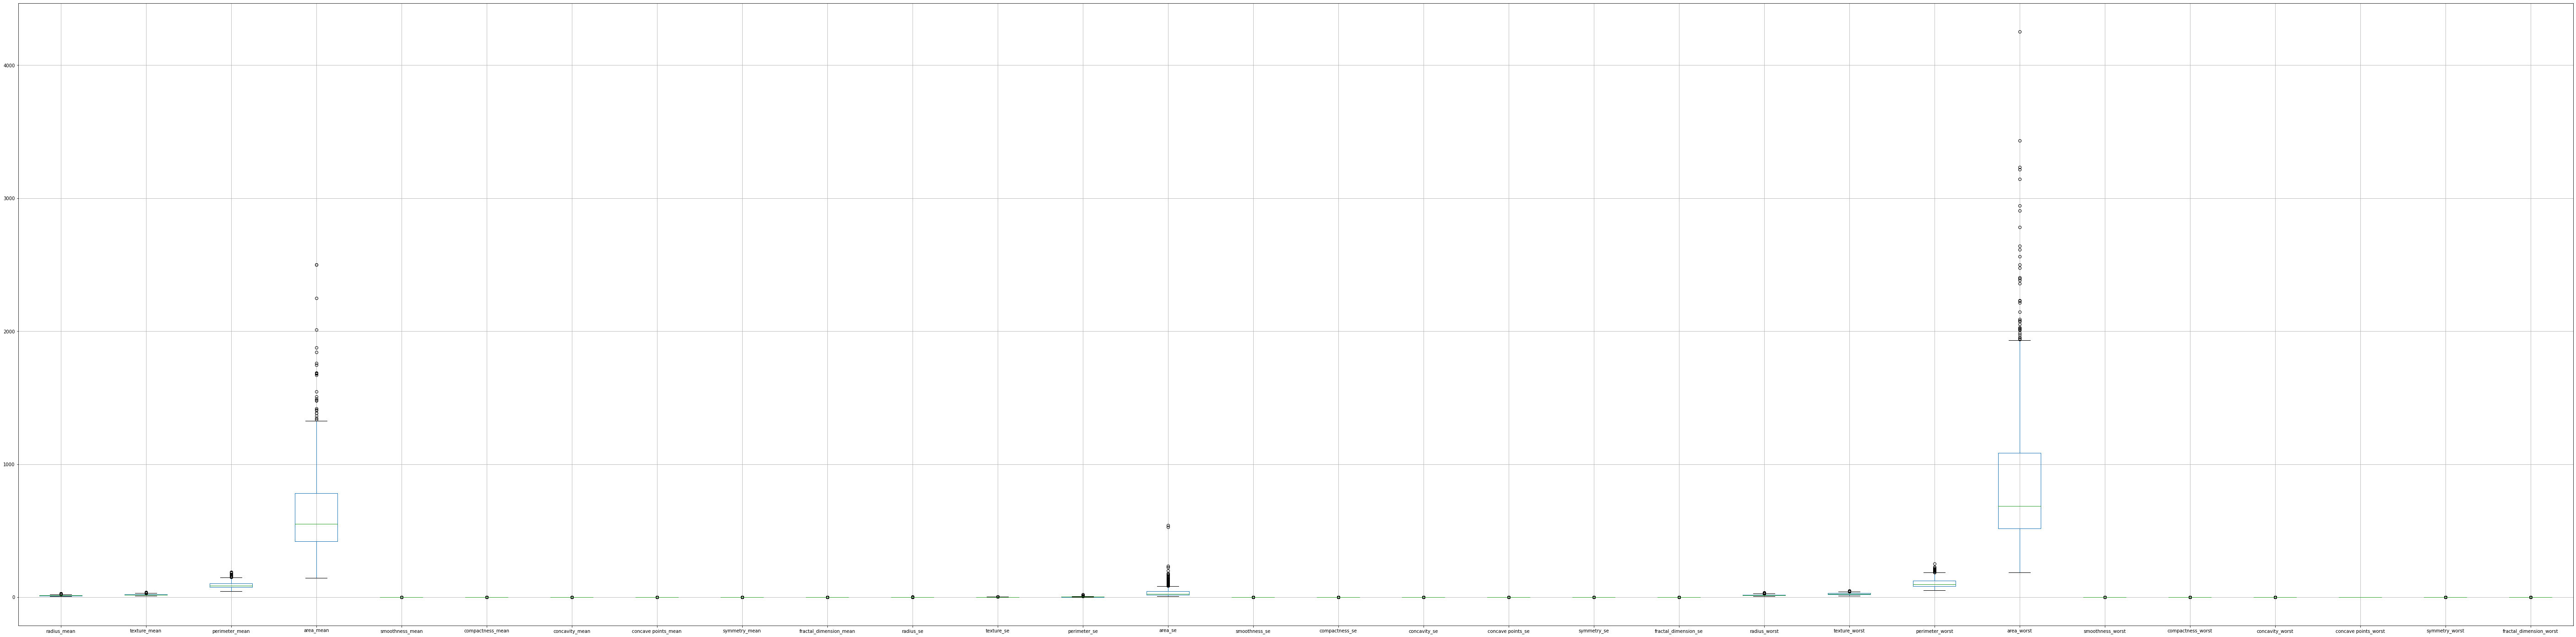

In [28]:
cols = df.drop(['id','diagnosis'], axis=1)
fig, ax = plt.subplots(figsize=(100,25))       
cols.boxplot(ax=ax)

Clearly the data has different range of values and outliers.

# MODEL

In [19]:
features = df.drop(columns=['diagnosis','id'])
y = df['diagnosis']
features.shape

(569, 30)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(features)

PCA:

In [21]:
pca = PCA()
X = pca.fit_transform(features) 
X.shape

(569, 30)

Test-train split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(features,y,test_size = 0.30,random_state = 42)

In [23]:
lr = LogisticRegression(random_state=0)
lr_pred = lr.fit(X_train,y_train).predict(X_test)

svmclf=svm.LinearSVC(random_state=0)
svm_pred=svmclf.fit(X_train,y_train).predict(X_test)

gnb = GaussianNB()
gnb_pred = gnb.fit(X_train, y_train).predict(X_test)

dt = DecisionTreeClassifier(random_state=0)
dt_pred = dt.fit(X_train, y_train).predict(X_test)

rf = RandomForestClassifier(max_depth=2,random_state=0)
rf_pred = rf.fit(X, y).predict(X_test)

knn = KNeighborsClassifier()
knn_pred = knn.fit(X, y).predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [24]:
models=['LR','SVM','GNB','DT','RF','KNN']
preds=[lr_pred,svm_pred,gnb_pred,dt_pred,rf_pred,knn_pred]
acc=[]
for i in preds:
    accscore=accuracy_score(i,y_test).round(2)
    acc.append(accscore)
data=zip(models,acc)
scoresdf=pd.DataFrame(data,columns=['MODEL','ACCURACY SCORE']) 
scoresdf

,MODEL,ACCURACY SCORE
0,LR,0.97
1,SVM,0.83
2,GNB,0.94
3,DT,0.92
4,RF,0.63
5,KNN,0.63


Linear Regression has the highest accuracy score.

Evaluate LR model

In [25]:
print(confusion_matrix(y_test,lr_pred))

[[107   1]
 [  4  59]]


In [26]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [30]:
pickle.dump(lr, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))